In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *


# turn of warning
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_train = pd.read_csv('data/train.csv')
df_original = pd.read_csv('data/ObesityDataSet.csv')
df_test = pd.read_csv('data/test.csv')

df = pd.concat((df_train, df_original), axis=0).drop(['id'], axis=1).reset_index()

In [5]:
df.head()

,index,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
s = setup(df,
          target='NObeyesdad',
            session_id=123,
            normalize=True,
            transformation=True,
            remove_multicollinearity=True,
            multicollinearity_threshold=0.95,
            fix_imbalance=True,
            experiment_name='obesity',
            normalize_method='robust')

,Description,Value
0,Session id,123
1,Target,NObeyesdad
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(22869, 18)"
5,Transformed data shape,"(28274, 28)"
6,Transformed train set shape,"(21413, 28)"
7,Transformed test set shape,"(6861, 28)"
8,Ordinal features,5
9,Numeric features,9


In [7]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9071,0.9902,0.9071,0.9073,0.9069,0.8911,0.8912,6.0550
lightgbm,Light Gradient Boosting Machine,0.9069,0.9909,0.9069,0.9071,0.9067,0.8908,0.8909,2.2550
rf,Random Forest Classifier,0.8966,0.9883,0.8966,0.8971,0.8964,0.8787,0.8789,0.5120
et,Extra Trees Classifier,0.8731,0.9834,0.8731,0.8734,0.8728,0.8512,0.8513,0.3830
dt,Decision Tree Classifier,0.8498,0.9134,0.8498,0.8508,0.8500,0.8239,0.8240,0.1660
lda,Linear Discriminant Analysis,0.8482,0.9806,0.8482,0.8506,0.8470,0.8222,0.8229,0.1340
knn,K Neighbors Classifier,0.7312,0.9178,0.7312,0.7263,0.7275,0.6847,0.6851,0.1760
nb,Naive Bayes,0.6725,0.9368,0.6725,0.6675,0.6535,0.6149,0.6205,0.1300
svm,SVM - Linear Kernel,0.6641,0.0000,0.6641,0.6711,0.6582,0.6064,0.6103,0.2940
qda,Quadratic Discriminant Analysis,0.6531,0.9450,0.6531,0.6574,0.6117,0.5937,0.6026,0.1320


In [8]:
best

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

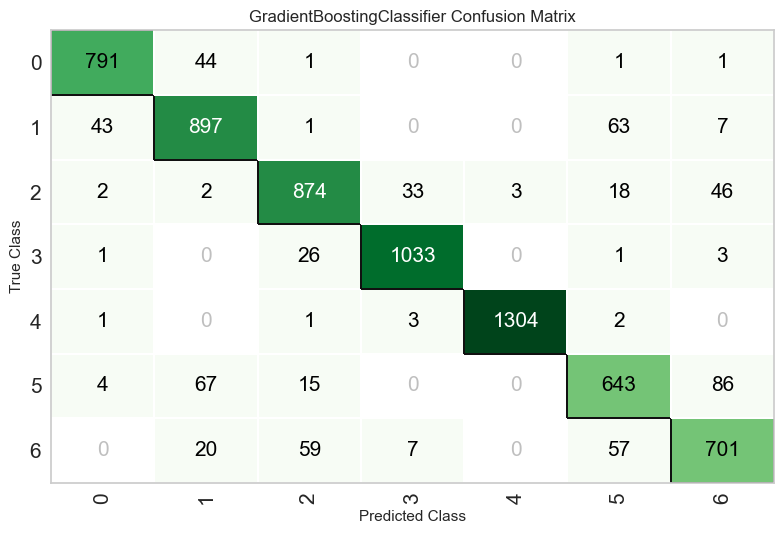

In [9]:
plot_model(best, plot='confusion_matrix')

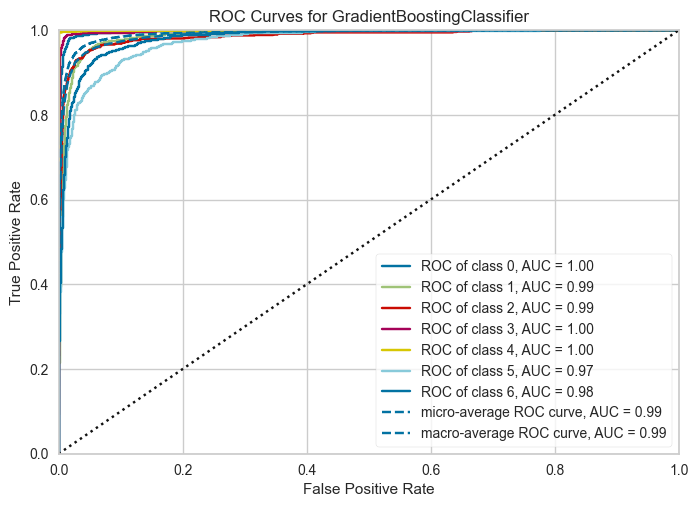

In [10]:
# plot AUC
plot_model(best, plot = 'auc')

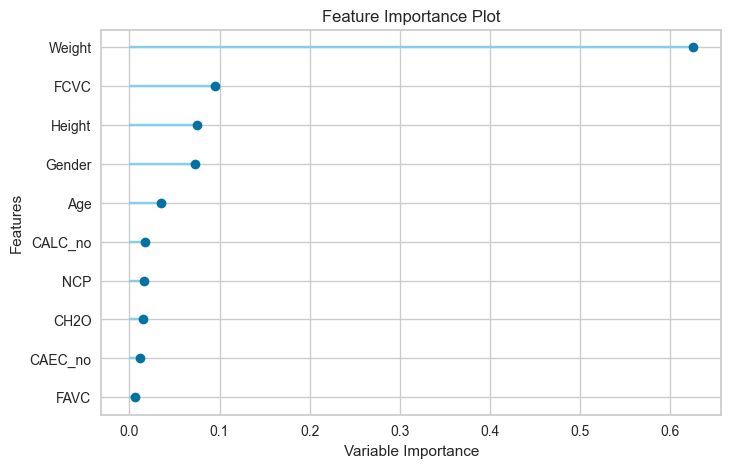

In [11]:
# plot feature importance
plot_model(best, plot = 'feature')

In [12]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [13]:
tuned_model = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8963,0.9868,0.8963,0.8965,0.8962,0.8785,0.8785
1,0.9076,0.9904,0.9076,0.9075,0.9074,0.8917,0.8917
2,0.9113,0.9918,0.9113,0.9113,0.9111,0.8960,0.8961
3,0.9032,0.9905,0.9032,0.9036,0.9030,0.8865,0.8866
4,0.9194,0.9924,0.9194,0.9198,0.9194,0.9056,0.9056
5,0.9113,0.9921,0.9113,0.9109,0.9109,0.8960,0.8961
6,0.9088,0.9903,0.9088,0.9096,0.9087,0.8931,0.8933
7,0.8982,0.9900,0.8982,0.8986,0.8981,0.8806,0.8807
8,0.9050,0.9911,0.9050,0.9048,0.9048,0.8886,0.8887


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [14]:
best

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [17]:
# predict on holdout
holdout = predict_model(tuned_model)
holdout.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9099,0.9896,0.9099,0.9096,0.9097,0.8944,0.8944


,index,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,prediction_label,prediction_score
21323,565,Male,17.120699,1.809251,58.968994,yes,yes,2.524428,4.000000,Sometimes,no,2.0,no,2.000000,0.03838,no,Automobile,Insufficient_Weight,Insufficient_Weight,0.9909
9693,9693,Female,39.135635,1.685947,79.713493,yes,yes,2.592247,3.000000,Sometimes,no,2.0,no,0.000000,0.00000,no,Automobile,Insufficient_Weight,Overweight_Level_II,0.8445
16693,16693,Female,21.000000,1.560000,62.000000,no,yes,2.000000,3.000000,Sometimes,no,3.0,no,1.000000,0.00000,Sometimes,Public_Transportation,Overweight_Level_I,Overweight_Level_I,0.5935
8094,8094,Female,21.652229,1.641601,88.119141,yes,yes,2.000000,1.000283,Sometimes,no,3.0,no,1.201403,0.00000,no,Public_Transportation,Obesity_Type_I,Obesity_Type_I,0.9953
3843,3843,Female,20.000000,1.650000,80.000000,yes,no,2.000000,1.000000,Sometimes,no,2.0,no,1.000000,0.00000,Sometimes,Public_Transportation,Overweight_Level_II,Overweight_Level_II,0.7646


In [18]:
test = df_test.copy()
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [19]:
# reset id and rename it to index
test = test.rename(columns={'id': 'index'})
test.head()


,index,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [20]:
best = finalize_model(best)

In [21]:
best

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['index', 'Age', 'Height', 'Weight',
                                             'FCVC', 'NCP', 'CH2O', 'FAF',
                                             'TUE'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              kee...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=123, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

In [22]:
predictions = predict_model(best, data=test)

In [27]:
save_model(best, 'models/xcgboost_obesity')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['index', 'Age', 'Height', 'Weight',
                                              'FCVC', 'NCP', 'CH2O', 'FAF',
                                              'TUE'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               kee...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss='log_loss

In [28]:
# load pipeline
loaded_best_pipeline = load_model('models/xcgboost_obesity')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/hc/lcgvr8h11sq4z32r5nwftth80000gp/T/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['index', 'Age', 'Height', 'Weight',
                                             'FCVC', 'NCP', 'CH2O', 'FAF',
                                             'TUE'],
                                    transformer=SimpleIm...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=123, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

In [29]:
predictions.head()

,index,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,prediction_label,prediction_score
0,20758,Male,26.899885,1.848294,120.644180,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation,Obesity_Type_II,0.9964
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I,0.9208
2,20760,Female,26.000000,1.643355,111.600555,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation,Obesity_Type_III,0.9959
3,20761,Male,20.979254,1.553127,103.669113,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation,Obesity_Type_I,0.7872
4,20762,Female,26.000000,1.627396,104.835342,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation,Obesity_Type_III,0.9949


In [25]:
predictions[['index', 'prediction_label']]\
    .rename(columns={'index': 'id', 'prediction_label': 'NObeyesdad'}) \
    .to_csv('data/submission8.csv', index=False)